<a href="https://colab.research.google.com/github/ehsan-lari/Conformal-Prediction/blob/main/ConformalPrediction_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

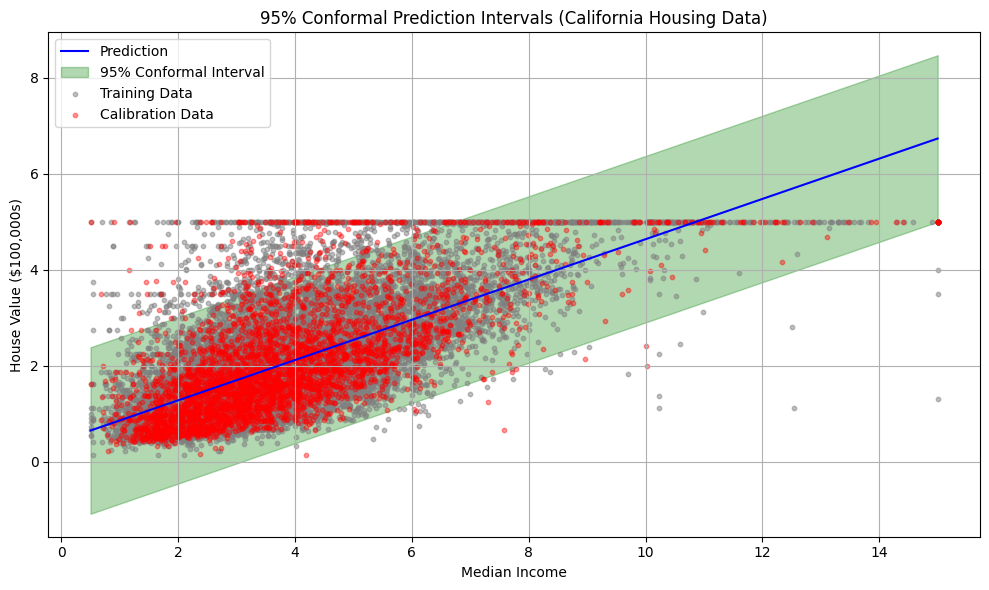

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
data = fetch_california_housing()
X = data.data[:, [0]]  # Use median income feature only for simplicity
y = data.target        # Median house value in $100,000s

# Split into training and calibration sets
X_train, X_calib, y_train, y_calib = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on calibration set and compute residuals
y_calib_pred = model.predict(X_calib)
calib_residuals = np.abs(y_calib - y_calib_pred)

# Set confidence level
alpha = 0.05  # 95% confidence
quantile = np.quantile(calib_residuals, 1 - alpha)

# Create test set
X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_test_pred = model.predict(X_test)

# Construct prediction intervals
lower_bound = y_test_pred - quantile
upper_bound = y_test_pred + quantile

# Plot predictions and intervals
plt.figure(figsize=(10, 6))
plt.plot(X_test, y_test_pred, label="Prediction", color="blue")
plt.fill_between(X_test.flatten(), lower_bound, upper_bound, color="green", alpha=0.3, label="95% Conformal Interval")
plt.scatter(X_train, y_train, color="gray", s=10, alpha=0.5, label="Training Data")
plt.scatter(X_calib, y_calib, color="red", s=10, alpha=0.4, label="Calibration Data")
plt.xlabel("Median Income")
plt.ylabel("House Value ($100,000s)")
plt.title("95% Conformal Prediction Intervals (California Housing Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


   Prediction  Lower Bound  Upper Bound  True Value
0    1.938439     0.404908     3.471970     1.99300
1    2.359391     0.825860     3.892923     2.66700
2    1.508961    -0.024571     3.042492     1.38100
3    2.434401     0.900870     3.967932     2.03300
4    1.153826    -0.379706     2.687357     0.88900
5    1.408184    -0.125347     2.941716     1.45500
6    3.679551     2.146020     5.213083     5.00001
7    2.352955     0.819423     3.886486     2.40300
8    1.526245    -0.007286     3.059777     1.87500
9    2.936535     1.403003     4.470066     3.96400


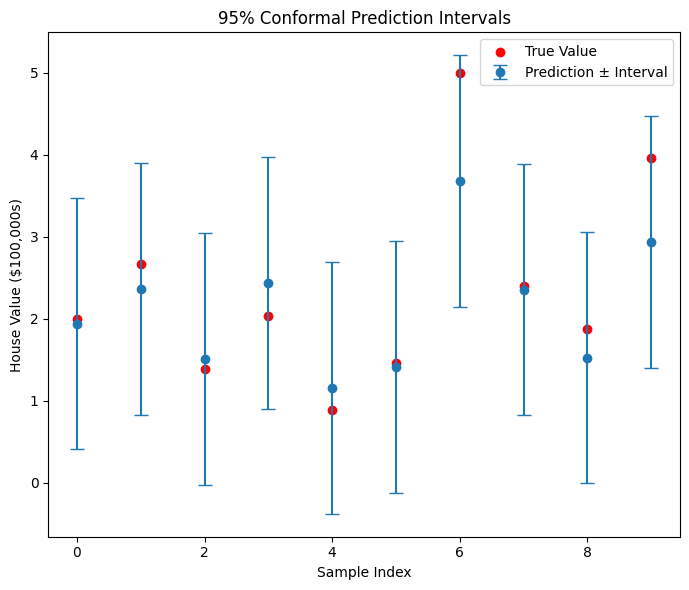

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load California housing data (includes 8 features)
data = fetch_california_housing()
X = data.data  # All features
y = data.target  # Median house value ($100,000s)

# Split data into training and calibration sets
X_train, X_calib, y_train, y_calib = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression on training set
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on calibration set and compute residuals
y_calib_pred = model.predict(X_calib)
calib_residuals = np.abs(y_calib - y_calib_pred)

# Define confidence level (95%)
alpha = 0.05
q = np.quantile(calib_residuals, 1 - alpha)  # Quantile of calibration residuals

# Predict on the full dataset to demonstrate intervals
y_pred = model.predict(X)
lower = y_pred - q
upper = y_pred + q

# Display sample prediction intervals
sample_idx = np.random.choice(len(y), size=10, replace=False)
results = pd.DataFrame({
    "Prediction": y_pred[sample_idx],
    "Lower Bound": lower[sample_idx],
    "Upper Bound": upper[sample_idx],
    "True Value": y[sample_idx]
})
print(results)

# Optional: visualize predicted vs. true values with interval bars
plt.figure(figsize=(7, 6))
plt.errorbar(range(len(sample_idx)), y_pred[sample_idx],
             yerr=[y_pred[sample_idx] - lower[sample_idx], upper[sample_idx] - y_pred[sample_idx]],
             fmt='o', capsize=5, label="Prediction ± Interval")
plt.scatter(range(len(sample_idx)), y[sample_idx], color='red', label="True Value")
plt.xlabel("Sample Index")
plt.ylabel("House Value ($100,000s)")
plt.title("95% Conformal Prediction Intervals")
plt.legend()
plt.tight_layout()
plt.show()
